# PageRank#

### Введение
В данной работе предлагается рассмотреть алгоритм ранжирования web-страниц, а именно нахождение вектора PageRank. PageRank — это числовая величина, характеризующая «важность» веб-страницы. Чем больше ссылок на страницу, тем она «важнее». Первый способ ранжирования web-страниц был предложен Сергеем Брином и Ларри Пейджем в 1998 г. Этот метод лег в основу поисковой системы Google. 

Рассмотрим ориентированный взвешанный граф. Пусть у графа $n$ вершин. Каждой паре вершин соответсвует некоторый вес(вероятность перехода) $p_{i,j}\geq 0$, причем $p_{i,j} = 0$, если ребра из вершины $i$ в $j$ нет. Числа $p_{i,j}$ образуют переходную матрицу $P=||p_{i,j}||_{i,j=1}^{n,n}$. Отметим, что матрица P является стохасчитичкой по строкам, а именно $\sum\limits_{j=1}^n p_{i,j}=1$. 

Вспомним некторый теоретический материал, который понадобится для дальнейших рассуждений:
###### Определение#

Распределение вероятностей $\pi = (\pi_0,\pi_1,\dots)$ называется стационарным или инвариантным, если $P^{T}\pi=\pi$.

###### Теорема#

В любой конечной цепи Маркова найдется хотя бы одно стационарное распределение.

###### Определение#

Конечная ОДМЦ называется эргодической, если стационарное распределение единственно.

###### Определение#

Конечная или счетная ОДМЦ называется сильно эргодической, если $\forall j \in E$ существует не зависящий от $i \in E$ положительный предел : $\lim\limits_{n\to \infty}p_{i,j}^{(n)} = p_j^*$. Таким образом, стационарное распределние $\pi$ единственно и $p^* = \pi$. Иными словами, с какого-то момента нам не важно как был распределен вектор начальных векторов $p(0)$.

###### Теорема(критерий сильной эргодичности)#

Конечная ОДМЦ является сильно эргодической тогда и только тогда, когда она - неразложима и апериодична.

В типичных web-графах оба условия, а именно неразложимость и апериодичность, выполняются. Для понимания можно представить web-сайт "ВКонтакте", где есть вкладка "Моя страница", в которую можно попасть из любой другой страницы, но при этом сущесствует и путь из вкладки "Моя страница" в любую другую страницу сайта. Получается, что web-граф сайта "Вконтакте"  неразложимый, ну и понятное дело - апериодичный, потому что из "Моя страница" можно перейти во вкладку "Моя страница".

Запишем уравнение Колмогорова-Чэпмена : $p^{T}(t+1)=p^{T}(t)P$. Предположим, что существует предел $\lim\limits_{t\to \infty}p(t) = \nu, \sum\limits_{i=1}^n \nu_{i}=1$, а для неразложимых и апериодичных ОДМЦ он действительно существует. Тогда получаем : 

$\nu^{T}P=\nu^{T}$. $(1)$

Вектор $\nu$ называют стациоарным распрелением вероятности. Его также можно встретить в экономических моделях, наример в моделе Леонтьева межотраслевой баланса при вычислении валого выпуска, а также в теории игр для принятия решений. Вектор $\nu$ можно понимать так: если человек достоточно долго перемещался по страницам web-сайта, то компоненты вектора $\nu$ отобразят, как часто человек заходил на определенную страницу. 

Именно из соотношения (1) и было предложено искать вектор ранжирования web-страниц в модели Брина-Пейджа.

### Метод простых итераций

Так как вектор $\nu$ является пределом $\lim\limits_{t\to \infty}p(t) = \nu$, а $p^{T}(t+1)=p^{T}(t)P$, то стационарное распределние вероятности можно вычислить методом простых итераций(МПИ). 

Для начало введем понятие спектральной щели матрицы P. Спектральная щель матрицы - это разница между максимальным собственным значением матрицы и следующим по величине модуля. Но для стохастической матрицы максимальное собственное значение всегда равно единице. Тогда сперктральная щель в нашем случае определяется следующим образом : $\alpha = 1 -|\beta|$. Оказывается, что верно следующие:

$||p(t)-\nu||_1 = \sum\limits_{k=1}^n|p_k(t)-\nu_k|\geq C\exp(\frac{-\alpha t}{\widetilde{C}})$. $(2)$

$C,\widetilde{C}$ - константы, зависящие от постановки задачи, как правило, ограничены числом 10.

Для того чтобы перейти с одной web-старницы на другую, пользователь должен с определенной вероятностью выбрать, по какой именно ссылке перейти. В случае если у документа несколько исходящих ссылок, то будем считать, что пользователь переходит по каждой из них с одинаковой вероятностью. Ну и, наконец, есть еще коэффициент телепортации, который показывает нам, что с какой-то вероятностью пользователь может с текущего документа переместиться на другую страницу, не обязательно связанную напрямую со страницей, в которой мы находимся в данный момент. Пусть пользователь телепортируется с векроятностью $\delta$. Тогда, если ввести квадратную матрицу E, размера $n$ на $n$, состоящую из одинаковых элементов $1/n$, уравнение $p^{T}(t+1)=p^{T}(t)P$ примет вид:

$p(t+1) = ((1-\delta)P^{T} + \delta E)p(t)$

или 

$p(t+1) = ((1-\delta)P^{T}p(t) + \delta (1/n \dots 1/n)^{T}$

При $0<\delta<1$ уравнение гарантированно имеет единственное решение. На практике для вычисления PageRank обычно используют уравнение с $\delta = 0.15$. 

Рассмотрим web-граф Google с сайта http://snap.stanford.edu/data/web-Google.html. Данный web-граф содержит 	875713 вершин, а это значит, что для двумерной матрицы $P$ нужно выделить 714 Gb памяти. Оперативная память современных компьютеров на порядок меньше, поэтому компьютер начинает задействовать память жетского диска, обращение к которой сильно замедляет работу программы вычисления PageRank. Но матрица P является разреженной матрицей - матрица с преимущественно нулевыми элементами. Для работы с ражреженными матрицами в Python используется библиотека sparse, которая помогает матрице $P$ занимать гораздо меньше памяти. Продемонстируем работу этой библиотеки на простом примере.

In [1]:
import numpy as np
from scipy.sparse import csr_matrix

# create dense matrix
A = [[0,1,0],[0,0,0],[0,0,5]]
# convert to sparse matrix (CSR method)
S = csr_matrix(A)
print(S)
# reconstruct dense matrix
B = S.todense()
print(B)

  (0, 1)	1
  (2, 2)	5
[[0 1 0]
 [0 0 0]
 [0 0 5]]


Таким образом, как мы видим, sparse представляет матрицу P в виде трёх массивов:
* массив индексов строк
* массив индексов столбцов
* массив значений

Данное представление сводит сложность алгоритма МПИ к следующей оценке: $\frac{sn}{\alpha}ln(\frac{2}{\varepsilon})$.

Применим данный алгоритм на реальных данных(http://snap.stanford.edu/data/web-Google.html).Узлы представляют собой веб-страницы, а направленные ребра-гиперссылки между ними. Эти данные были опубликованы в 2002 году компанией Google в рамках конкурса Google Programming Contest.

0.0010446019327659552
--- 5.115016937255859 seconds ---
Разреженность матрицы : 0.999993921416814
Количество итераций : 26
Cтраница с 1 PageRank : 597621
Cтраница с 2 PageRank : 41909
Cтраница с 3 PageRank : 163075
Cтраница с 4 PageRank : 537039
Cтраница с 5 PageRank : 384666


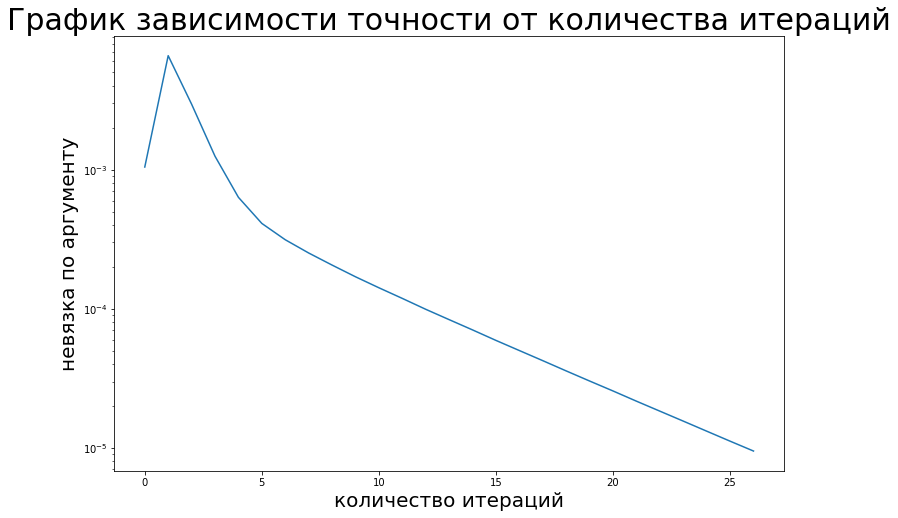

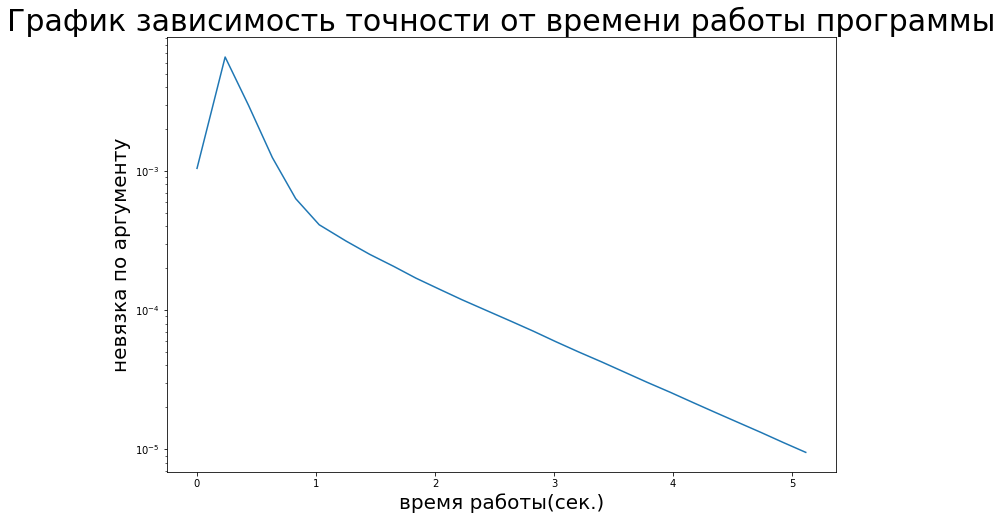

In [36]:
import pandas as pd
import numpy as np
import time
import numpy.linalg as ln
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
from tqdm import tqdm


data = pd.read_csv("web-Google.txt", names = ['i','j'], sep="\t", header=None)
NODES = 916428
EDGES = 5105039


NEW = csr_matrix((np.ones(len(data['i'])),(data['i'],data['j'])),shape=(NODES,NODES))
b = NEW.sum(axis=1)
NEW = NEW.transpose()
p0 = np.ones((NODES,1))/NODES
eps = 10**-5
delta = 0.15 
ERROR = True
k = 0

start_time = time.time()

x_1 = []
y_1 = []
y1_1 = []
y_1.append(ln.norm(p0))
x_1.append(k)
y1_1.append(time.time() - start_time)

start_time = time.time()
while (ERROR == True):
    with np.errstate(divide='ignore'): 
             z = p0 / b
    p1 = (1-delta) * NEW.dot(csr_matrix(z)) + delta * np.ones((NODES,1))/NODES
    if (ln.norm(p1-p0) < eps):
        ERROR = False
    y1_1.append(time.time() - start_time)
    k = k + 1
    x_1.append(k)
    y_1.append(ln.norm(p1-p0))
    p0 = p1

print("--- %s seconds ---" % (time.time() - start_time))
print(f"Разреженность матрицы : {1 - len(data['i'])/(NODES*NODES)}")
print(f"Количество итераций : {k}")
ans1 = p1
for number in range(1,6):
    print(f"Cтраница с {number} PageRank : {np.argmax(p1)}")
    p1[np.argmax(p1)]=0

      
plt.figure(figsize=(12, 8))
plt.semilogy(x_1,y_1)
plt.title('График зависимости точности от количества итераций', fontsize=30)
plt.xlabel("количество итераций",fontsize=20)
plt.ylabel("невязка по аргументу",fontsize=20)
plt.show()   

plt.figure(figsize=(12, 8))
plt.semilogy(y1_1,y_1)
plt.title('График зависимость точности от времени работы программы', fontsize=30)
plt.xlabel("время работы(сек.)",fontsize=20)
plt.ylabel("невязка по аргументу",fontsize=20)
plt.show()

С помощью вектора PageRank можно так же определять кандидата на выборах. Небольшая часть участников Википедии-это администраторы, которые являются пользователями с доступом к дополнительным техническим функциям, помогающим в обслуживании. Для того, чтобы пользователь стал администратором, выдается запрос на администраторство, и сообщество Википедии посредством публичного обсуждения или голосования решает, кого продвигать на должность администратора. Данные взяты с сайта http://snap.stanford.edu/data/wiki-Vote.html. 

In [16]:
import pandas as pd
import numpy as np
import time
import numpy.linalg as ln
from scipy.sparse import csr_matrix



data = pd.read_csv("wiki-Vote.txt", names = ['i','j'], sep="\t", header=None)
data['i']= data['i'] - 1
data['j']= data['j'] - 1
NODES = 8297
EDGES = 103689


NEW = csr_matrix((np.ones(len(data['i'])),(data['i'],data['j'])),shape=(NODES,NODES))
b = NEW.sum(axis=1)
NEW = NEW.transpose()
p0 = np.ones((NODES,1))/NODES
eps = 10**-5
delta = 0.15
ERROR = True
k = 0

start_time = time.time()

while (ERROR == True):
    with np.errstate(divide='ignore'): 
             z = p0 / b
    p1 = (1-delta)*NEW.dot(csr_matrix(z)) + delta * np.ones((NODES,1))/NODES
    if (ln.norm(p1-p0) < eps):
        ERROR = False
    p0 = p1
    k = k + 1

print("--- %s seconds ---" % (time.time() - start_time))
print(f"Разреженность матрицы : {1 - len(data['i'])/(NODES*NODES)}")
print(f"Количество итераций : {k}")
print(f"Новый администратор : {np.argmax(p1)+1}")

--- 0.04835319519042969 seconds ---
Разреженность матрицы : 0.9984937727309922
Количество итераций : 15
Новый администратор : 4037


### Метод Поляка-Тремба

Если $\alpha$ оказалась слишком маленьким, то это может существенно замедлить МПИ. Тогда для решения задачи PageRank используют усреднение степенных итераций. Рассмотрим вектор, построенный по итерациям степенного метода :  $\overline{p}_{T} = \frac{1}{T}\sum\limits_{t=1}^T p(t)$.

Этот ветор всегда сходится к вещественному неотрицательному собственному вектору для произвольной матрицы $P$, при этом имеет место оценка невязки $||P^{T}\overline{p}_{T}-\overline{p}_{T}||\geq \frac{2}{T}$$(3)$. Сходимость связана с тем, что для любой матрицы $P$ существует предел по Чезаро:

$\widetilde{P} = \lim\limits_{T\to \infty} \frac{1}{T} \sum\limits_{k=1}^T P^{k}$.

Оценка $||P^{T}\overline{p}_{T}-\overline{p}_{T}||\geq \frac{2}{T}$ не зависит от $\alpha$. Однако, если в МПИ мы гарантировали близость найденного вектора $p(T)$ к вектору PageRank $\nu$, то в $(3)$ из $||P^{T}\overline{p}_{T}-\overline{p}_{T}|| \approx \varepsilon$ при больших $n$ следует, что $||\overline{p}_{T}-\nu|| \approx \frac{\varepsilon}{\alpha}$, то есть снова появляется нехорошая зависимость от $\alpha$. При этом сложность этого алгоритма : $\frac{2sn}{\varepsilon}$

### Метод условного градиента

Вектор PageRank также можно понимать, как решение следующей задачи:

$||P^{T}p - p||_2^2 \rightarrow {\underset{p\geq 0:\sum\limits_{k=1}^n p_{k}=1}{min}}$

Так как $||P^{T}p - p||\geq 0$ и только при $p=\nu$ : $||P^{T}p - p||= 0$. Пусть $A=P^{T}-I$. Перепишем задачу поиска вектора PageRank следующим образом :

$\frac{1}{2}||Ax||_2^2 \rightarrow {\underset{x\in S_n(1)}{min}}$

Для решения этой задачи будем использовать метод условного градиента Франка–Вульфа. Напомним, в чем состоит метод. Выберем одну из вершин симплекса и возьмем точку старта в этой вершине. Решаем задачу:

$<\nabla f(x_k),y>\rightarrow {\underset{y\in S_n(1)}{min}}$

Обозначим решение этой задачи через:

$y_k=(0,\dots,0,1,0,\dots,0)$,

где 1 стоит на позиции:

$i_k = {\underset{i = 1,\dots,n}{argmin}}\frac{\partial f(x_k)}{x^i}$

Положим

$x_k = (1-\gamma_k)x_k+\gamma_k y_k, \gamma_k=\frac{1}{k+1}$.

Реализуем метод Франка-Вульфа на следующих данных : http://snap.stanford.edu/data/p2p-Gnutella08.html.




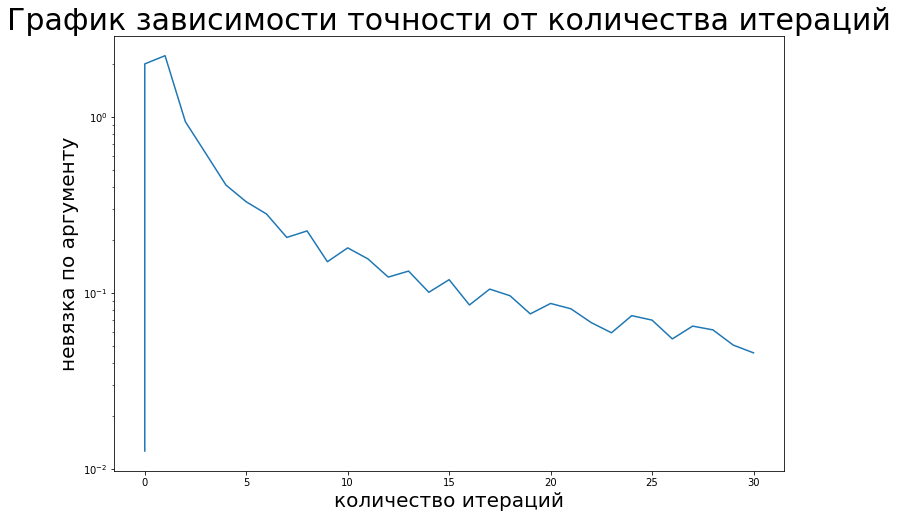

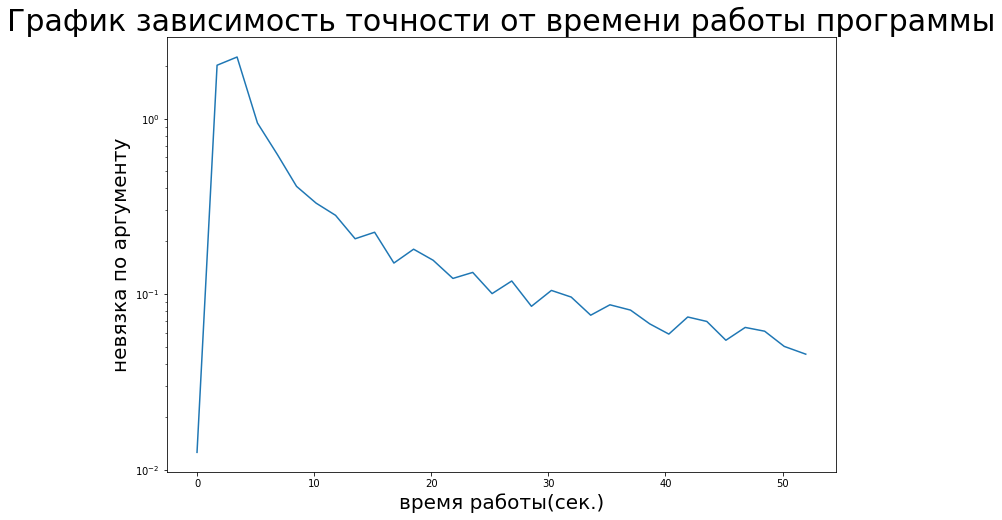

In [2]:
import cvxpy as cp
import numpy as np
import pandas as pd
import time
import numpy.linalg as ln
from scipy.sparse import csr_matrix
from tqdm import tqdm
import matplotlib.pyplot as plt

def df(x):
    B = ((NEW.transpose()-csr_matrix(np.eye(NODES))))
    A = ((NEW-csr_matrix(np.eye(NODES))).dot(x))
    return B.dot(A)

data = pd.read_csv("grad.txt", names = ['i','j'], sep="\t", header=None)
NODES = 6301
EDGES = 20777


NEW = csr_matrix((np.ones(len(data['i'])),(data['i'],data['j'])),shape=(NODES,NODES))
b = NEW.sum(axis=1)
NEW = NEW.transpose()
e = np.ones(NODES)
with np.errstate(divide='ignore'): 
             z = e / b
NEW = NEW.dot(csr_matrix(z))

x = []
y1 = []
y2 = []

eps = 0.05
k=0
a_0 = 1

start_time = time.time()

y = np.zeros((NODES,1))

p0 = np.ones((NODES,1))/NODES
x.append(k)
y1.append(ln.norm(p0))
y2.append(time.time() - start_time)

p0[0] = 0.1

y[np.argmin(df(p0))] = 1              

p1 = (1-2/(1+k))*p0 + 2/(1+k)*y

x.append(k)
y1.append(ln.norm(p1-p0))
y2.append(time.time() - start_time)
while ((ln.norm(p1-p0) > eps)):
        y = np.zeros((NODES,1))
        k = k + 1
        p0 = p1
        y[np.argmin(df(p0))] = 1    
        p1 = (1-2/(1+k))*p0 + 2/(1+k)*y
        y2.append(time.time() - start_time)
        x.append(k)
        y1.append(ln.norm(p1-p0))       

plt.figure(figsize=(12, 8))
plt.semilogy(x,y1)
plt.title('График зависимости точности от количества итераций', fontsize=30)
plt.xlabel("количество итераций",fontsize=20)
plt.ylabel("невязка по аргументу",fontsize=20)
plt.show()    

plt.figure(figsize=(12, 8))
plt.semilogy(y2,y1)
plt.title('График зависимость точности от времени работы программы', fontsize=30)
plt.xlabel("время работы(сек.)",fontsize=20)
plt.ylabel("невязка по аргументу",fontsize=20)
plt.show()    

Прогоним эти же данные через МПИ:

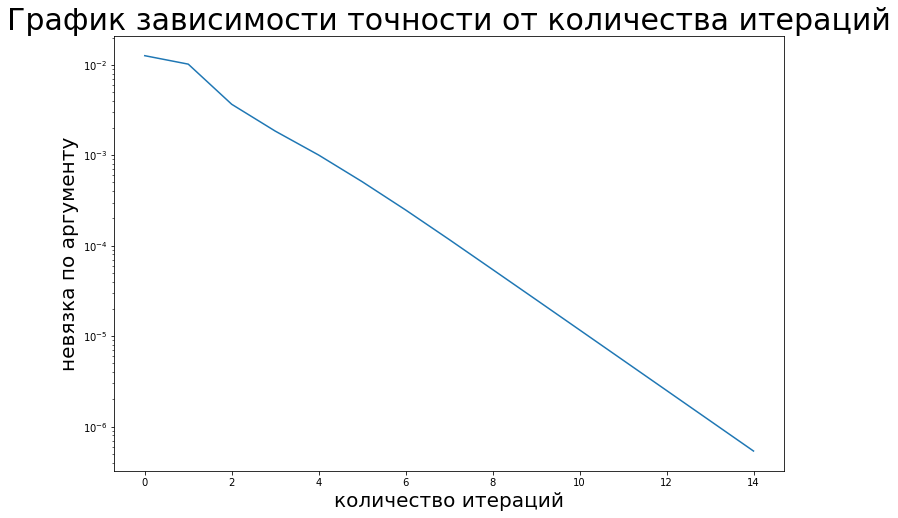

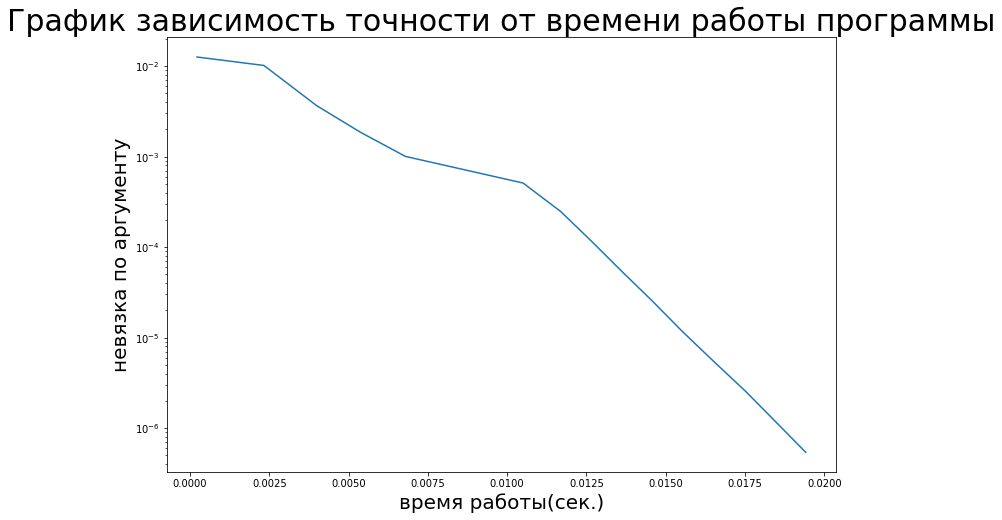

In [11]:
import pandas as pd
import numpy as np
import time
import numpy.linalg as ln
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
from tqdm import tqdm


data = pd.read_csv("grad.txt", names = ['i','j'], sep="\t", header=None)
NODES = 6301
EDGES = 20777

NEW = csr_matrix((np.ones(len(data['i'])),(data['i'],data['j'])),shape=(NODES,NODES))
b = NEW.sum(axis=1)
NEW = NEW.transpose()
p0 = np.ones((NODES,1))/NODES
eps = 10**-6
delta = 0.15 
ERROR = True
k = 0

start_time = time.time()

x_1 = []
y_1 = []
y1_1 = []
y_1.append(ln.norm(p0))
x_1.append(k)
y1_1.append(time.time() - start_time)

start_time = time.time()
while (ERROR == True):
    with np.errstate(divide='ignore'): 
             z = p0 / b
    p1 = (1-delta) * NEW.dot(csr_matrix(z)) + delta * np.ones((NODES,1))/NODES
    if (ln.norm(p1-p0) < eps):
        ERROR = False
    y1_1.append(time.time() - start_time)
    k = k + 1
    x_1.append(k)
    y_1.append(ln.norm(p1-p0))
    p0 = p1

      
plt.figure(figsize=(12, 8))
plt.semilogy(x_1,y_1)
plt.title('График зависимости точности от количества итераций', fontsize=30)
plt.xlabel("количество итераций",fontsize=20)
plt.ylabel("невязка по аргументу",fontsize=20)
plt.show()   

plt.figure(figsize=(12, 8))
plt.semilogy(y1_1,y_1)
plt.title('График зависимость точности от времени работы программы', fontsize=30)
plt.xlabel("время работы(сек.)",fontsize=20)
plt.ylabel("невязка по аргументу",fontsize=20)
plt.show()

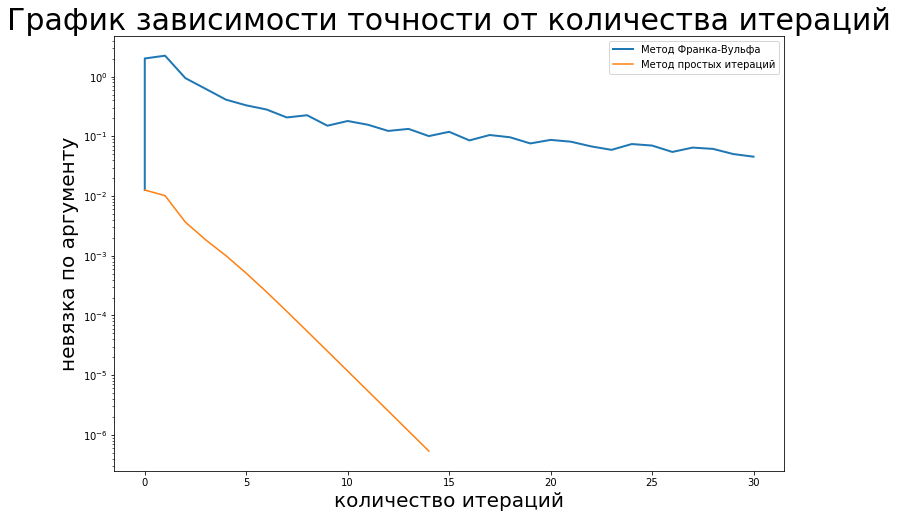

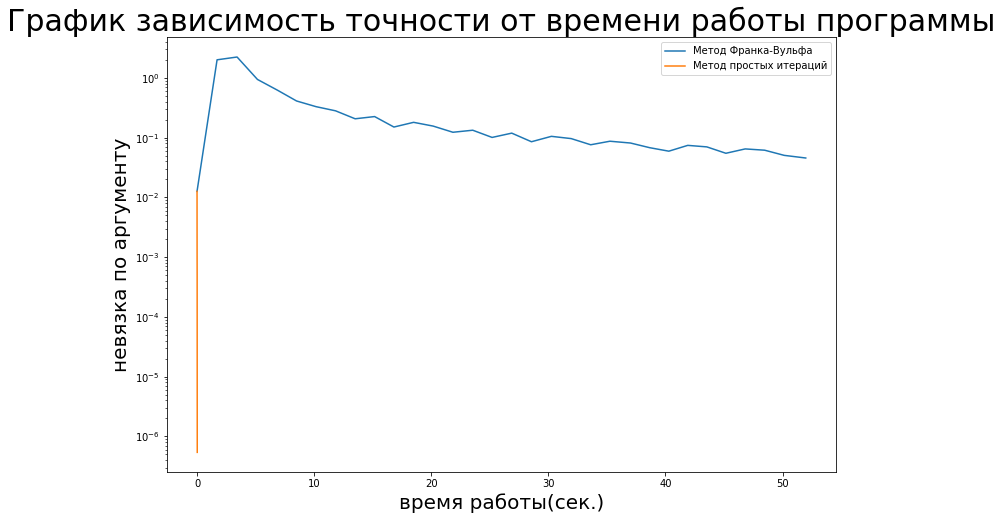

In [12]:
plt.figure(figsize=(12, 8))
plt.semilogy(x,y1,linewidth=2, label = 'Метод Франка-Вульфа',markersize = 20)
plt.semilogy(x_1,y_1,label='Метод простых итераций',markersize = 20)
plt.title('График зависимости точности от количества итераций', fontsize=30)
plt.xlabel("количество итераций",fontsize=20)
plt.ylabel("невязка по аргументу",fontsize=20)
plt.legend()
plt.show()    

plt.figure(figsize=(12, 8))
plt.semilogy(y2,y1,label='Метод Франка-Вульфа',markersize = 10)
plt.semilogy(y1_1,y_1,label='Метод простых итераций',markersize = 10)
plt.title('График зависимость точности от времени работы программы', fontsize=30)
plt.xlabel("время работы(сек.)",fontsize=20)
plt.ylabel("невязка по аргументу",fontsize=20)
plt.legend()
plt.show() 

### Метод Монте-Карло

Для эффективной работы реальной поисковой системы скорость вычисления вектора PageRank оказывается важнее точности его вычисления. МПИ не позволяет пожертвовать точностью в угоду скорости вычисления.Алгоритм Монте-Карло помогает в какой-то мере справиться с этой проблемой. Он основан на физическом смысле эргодической ОДМЦ. Мы запускаем виртуального пользователя, который блуждает по страницам сайтам. Собирая статистику посещения им страниц сайта, спустя достаточно большой промежуток времени мы получаем для каждой страницы, сколько раз на ней был пользователь. Нормируя этот вектор, мы получаем искомый вектор PageRank.

До старта алгоритма каждой вершине ставим в соответствие свое разбиение отрезка $\left[0,1\right]$ так, чтобы число разбиений этого отрезка равнялось количеству выходящих ребер из этой вершины. А длины этих подотрезков равнялись вероятности перехода в соотсветсвующую вершину. Далее запускаем алгоритм и на каждой итерации генерируем случайную величину, равномерно распределенную на отрезке $\left[0,1\right]$. В зависимости от того, в какой подотрезок она попала, в такую вершину дальше и идем.

Для данного алгоритма справедлив следующий результат : пусть $p(T)$ - вектор частот пребывания на различных страницах сайта после T шагов, где $T\gg T_0 = C\alpha ^{-1}ln(\frac{n}{\varepsilon})$, тогда с вероятностью меньше $1 - \sigma$ имеет место неравенство:

$||p(T)-\nu||_2\leq C \sqrt\frac{\ln n + \ln \sigma^{-1}}{\alpha T}$

Сложность данного алгоритма : $C(n+\frac{log_2n\cdot ln(n/\sigma)}{\alpha {\varepsilon}^2})$.

Продемонстрируем работу этого алгоритма на уже используемых данных(http://snap.stanford.edu/data/web-Google.html). Построим график зависимости времени работы алгоритма от количества блужданий и график работы невязки между PageRank, полученным методом МПИ($p_1$) и полученным методом Монте-Карло($p_2$).

100%|██████████| 1900000/1900000 [00:26<00:00, 72268.90it/s]


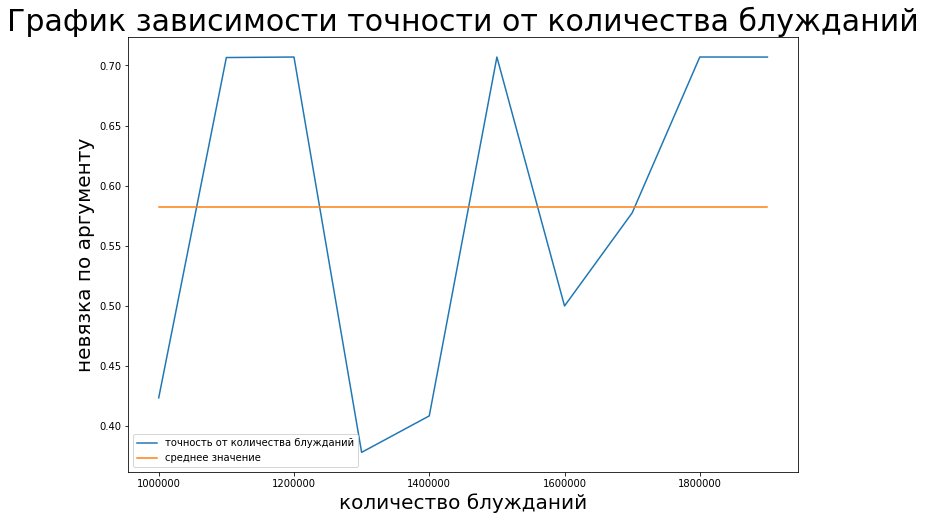

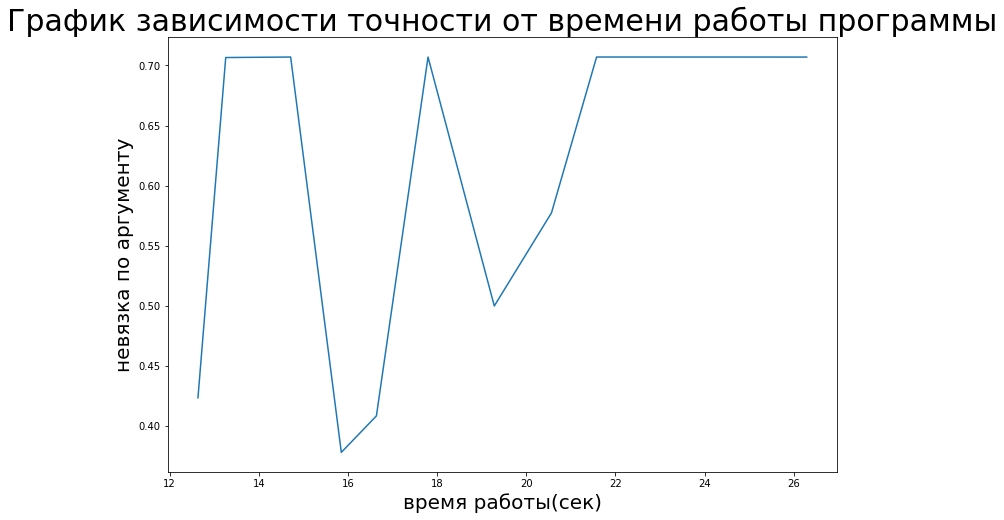

In [20]:
import pandas as pd
import numpy as np
import random
import time
import numpy.linalg as ln
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
from tqdm import tqdm


def get_edges(m, i):
    if (i == NODES):
        return random.randint(0, NODES)
    else:
        if (len(m.indices[m.indptr[i] : m.indptr[i+1]]) != 0):
            return np.random.choice(m.indices[m.indptr[i] : m.indptr[i+1]])
        else:
            return NODES
        

data = pd.read_csv("web-Google.txt", names = ['i','j'], sep="\t", header=None)
NODES = 916428
EDGES = 5105039

NEW = csr_matrix((np.ones(len(data['i'])),(data['i'],data['j'])),shape=(NODES,NODES))

x = []
#y = []
y1 = []
y2 = []

for total in range(1000000,2000000,100000):
    k = random.randint(0, NODES)
    ans = np.zeros(NODES+1)
#    margin = np.zeros(NODES)
    margin2 = np.zeros(NODES)
    ans_prev = np.zeros(NODES)
    start_time = time.time()
    for t in tqdm(range(total), position = 0):
        j = get_edges(NEW, k)
        ans[j] = ans[j]+1
        k = j
    y1.append(time.time() - start_time)
    x.append(total)
    ans = np.delete(ans, len(ans)-1)
    ans = ans/sum(ans)
    for number in range(len(ans)):
#        margin[number] = ans[number] - ans1[number]
        margin2[number] = ans[number] - ans_prev[number]
#    y.append(ln.norm(margin))
    y2.append(ln.norm(margin2))
    ans_prev = ans


plt.figure(figsize=(12, 8))
plt.plot(x,y2, label='точность от количества блужданий',markersize = 10)
y3 = [sum(y2)/len(y2)]*len(x)
plt.plot(x, y3, label='среднее значение',markersize = 10)
plt.title('График зависимости точности от количества блужданий', fontsize=30)
plt.xlabel("количество блужданий", fontsize=20)
plt.ylabel("невязка по аргументу", fontsize=20)
plt.legend()
plt.show()


plt.figure(figsize=(12, 8))
plt.plot(y1,y2)
plt.title('График зависимости точности от времени работы программы', fontsize=30)
plt.xlabel("время работы(сек)", fontsize=20)
plt.ylabel("невязка по аргументу", fontsize=20)
plt.show()

